<a href="https://colab.research.google.com/github/siruku6/flask_sample/blob/master/directory/230218_easy_pattern_recognitions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

# 第2章 事前確率と事後確率

## p.25

In [ ]:
# -------------- 前提条件 --------------
# それぞれのコインの含有率
pi_s = np.array([0.1, 0.4, 0.5])

# それぞれのコインが表になる確率
front_probs = np.array([0.8, 0.6, 0.3])

# それぞれのコインが裏になる確率
back_probs = 1 - front_probs

# -------------- Bayesian update --------------
def bayesian_update(front_or_back_probs, prior_probs) -> np.ndarray:
    """
    ベイズ更新を1回だけ実行する関数
    """
    posterior_probs = front_or_back_probs * prior_probs / sum(front_or_back_probs * prior_probs)
    return posterior_probs


In [ ]:
# 1回だけベイズ更新すると
posterior_probs = bayesian_update(front_probs, pi_s)
posterior_probs

array([0.17021277, 0.5106383 , 0.31914894])

## p.33 10回ベイズ更新する

In [ ]:
posterior_probs = bayesian_update(front_probs, pi_s)
posterior_probs = bayesian_update(front_probs, posterior_probs)
posterior_probs = bayesian_update(front_probs, posterior_probs)
posterior_probs = bayesian_update(front_probs, posterior_probs)
posterior_probs = bayesian_update(back_probs, posterior_probs)
posterior_probs = bayesian_update(front_probs, posterior_probs)
posterior_probs = bayesian_update(front_probs, posterior_probs)
posterior_probs = bayesian_update(back_probs, posterior_probs)
posterior_probs = bayesian_update(front_probs, posterior_probs)
posterior_probs = bayesian_update(back_probs, posterior_probs)
posterior_probs

array([0.18198217, 0.777334  , 0.04068383])

## p.34 100回ベイズ更新する

In [ ]:
series_coin_toss = ["front"] * 88 + ["back"] * 12
# series_coin_toss = ["front"] * 7 + ["back"] * 3


prior_probs = pi_s

def continuous_bayesian_update(
    prior_probs: np.ndarray, series_coin_toss: list
) -> np.ndarray:

    # NOTE: 一切の試行をする前なら、試行から得られる情報が何もないため、
    #     事前確率がそのまま事後確率になる
    posterior_probs = prior_probs

    for cointoss_result in series_coin_toss:
        if cointoss_result == "front":
            probs = front_probs
        elif cointoss_result == "back":
            probs = back_probs

        posterior_probs = bayesian_update(probs, prior_probs)
        prior_probs = posterior_probs

    return posterior_probs


continuous_bayesian_update(prior_probs, series_coin_toss)

array([9.99999834e-01, 1.65886501e-07, 5.52761803e-31])

# 第3章 ベイズ決定則

## p.42

In [ ]:
available_front_counts = np.arange(11)
prior_probs = pi_s

posterior_probs_dict = {}

for front_count in available_front_counts:
    back_count = 10 - front_count
    series_coin_toss = ["front"] * front_count + ["back"] * back_count

    posterior_probs = continuous_bayesian_update(prior_probs, series_coin_toss)
    posterior_probs_dict[front_count] = posterior_probs

posterior_probs_dict

{0: array([7.22872052e-07, 2.96088393e-03, 9.97038393e-01]),
 1: array([6.69719146e-06, 1.02868861e-02, 9.89706417e-01]),
 2: array([6.09365998e-05, 3.50994815e-02, 9.64839582e-01]),
 3: array([5.22617226e-04, 1.12885321e-01, 8.86592062e-01]),
 4: array([0.0037913 , 0.30709491, 0.68911379]),
 5: array([0.01966587, 0.59735088, 0.38298325]),
 6: array([0.06907423, 0.78679862, 0.14412716]),
 7: array([0.18198217, 0.777334  , 0.04068383]),
 8: array([0.3808422 , 0.61003556, 0.00912224]),
 9: array([0.62373543, 0.37466383, 0.00160074]),
 10: array([8.15974145e-01, 1.83801488e-01, 2.24367051e-04])}

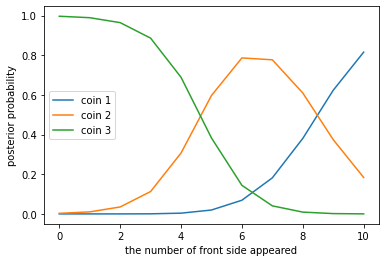

In [ ]:
result_10 = pd.DataFrame.from_dict(posterior_probs_dict, orient="index")
plt.plot(result_10[0], label="coin 1")
plt.plot(result_10[1], label="coin 2")
plt.plot(result_10[2], label="coin 3")
plt.xlabel("the number of front side appeared")
plt.ylabel("posterior probability")
plt.legend()
plt.show()

## p.44

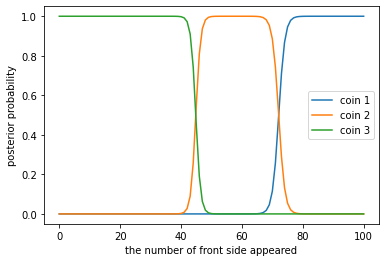

In [ ]:
available_front_counts = np.arange(101)
prior_probs = pi_s

posterior_probs_dict = {}

for front_count in available_front_counts:
    back_count = 100 - front_count
    series_coin_toss = ["front"] * front_count + ["back"] * back_count

    posterior_probs = continuous_bayesian_update(prior_probs, series_coin_toss)
    posterior_probs_dict[front_count] = posterior_probs

result_100 = pd.DataFrame.from_dict(posterior_probs_dict, orient="index")

plt.plot(result_100[0], label="coin 1")
plt.plot(result_100[1], label="coin 2")
plt.plot(result_100[2], label="coin 3")
plt.xlabel("the number of front side appeared")
plt.ylabel("posterior probability")
plt.legend()
plt.show()

In [ ]:
probability_of_error = 1 - result_10.max(axis=1)

In [ ]:
def number_of_combinations(n: int, r: int) -> int:
    """
    n: int ... total_num
    r: int ... subset_num
    """
    return math.factorial(n) / (math.factorial(r) * math.factorial(n - r))


def bernoulli_probability(n: int, r: int, theta: float):
    return number_of_combinations(n, r) * ((theta ** r) * ((1 - theta) ** (n - r))) 

number_of_combinations(5, 4)
bernoulli_probability(10, 7, 0.5)

0.1171875

In [ ]:
def probabilities_of_front(n: int, r: int, prior_probs: np.ndarray, front_probs: np.ndarray) -> np.ndarray:
    """
    n: ベルヌーイ試行の試行回数
    r: 試行中の成功回数
    prior_probs: 事前確率 - 各コインの含有率（出現確率）
    front_probs: 各コインの表が出る確率
        example) np.array([0.3, 0.5, 0.2])

    Returns
    ---------
    コインの表がr回出る確率
    """
    assert prior_probs.shape == front_probs.shape

    prior_probs * bernoulli_probability(n, r, front_probs)
    return sum(prior_probs * bernoulli_probability(n, r, front_probs))


def bayes_error(n, pi_s, front_probs) -> pd.DataFrame:
    available_front_counts = np.arange(n + 1)
    prior_probs = pi_s

    posterior_probs_dict = {}

    e_b_r_s = []
    for front_count in available_front_counts:
        back_count = n - front_count
        series_coin_toss = ["front"] * front_count + ["back"] * back_count

        posterior_probs = continuous_bayesian_update(prior_probs, series_coin_toss)
        probability_of_error = 1 - posterior_probs.max()
        e_b_r = probability_of_error * probabilities_of_front(n, front_count, pi_s, front_probs)
        e_b_r_s.append(e_b_r)

    return sum(e_b_r_s)


# probabilities_of_front(10, 10, pi_s, front_probs)
bayes_error(10, pi_s, front_probs)

0.22259161013999995

In [ ]:
bayes_error(100, pi_s, front_probs)

0.006150932942506913

  0%|          | 0/101 [00:00<?, ?it/s]

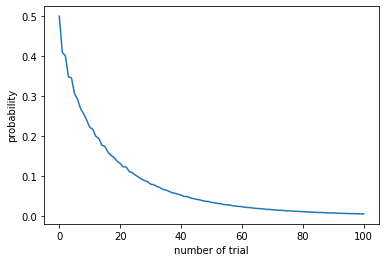

In [ ]:
zero_to_100 = np.arange(0, 101)

bayes_errors = []
for num_of_trial in tqdm(zero_to_100):
    bayes_errors.append(bayes_error(num_of_trial, pi_s, front_probs))

plt.plot(bayes_errors, label="rate of bayes error")
plt.xlabel("number of trial")
plt.ylabel("probability")
plt.show()


# 第4章 パラメータ推定

## p.50 最尤推定 (Maximum Likelihood Estimation)

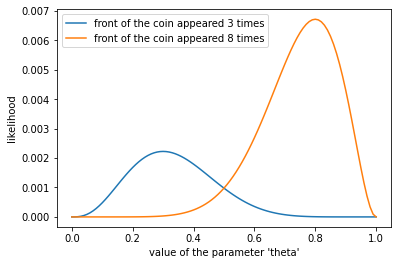

In [ ]:
# 試行回数
n = 10


def calc_likelihoods(n: int, r: int):
    """
    n: 試行回数
    r: 表が出た回数
    """
    available_thetas = np.arange(0, 1.01, step=0.01)

    likelihoods = {}
    for theta in available_thetas:
        likelihood = (theta ** r) * ((1 - theta) ** (n - r))
        likelihoods[theta] = likelihood

    return pd.DataFrame.from_dict(likelihoods, orient="index")


likelihoods_3 = calc_likelihoods(n, 3)
likelihoods_8 = calc_likelihoods(n, 8)

plt.plot(likelihoods_3, label="front of the coin appeared 3 times")
plt.plot(likelihoods_8, label="front of the coin appeared 8 times")
plt.xlabel("value of the parameter 'theta'")
plt.ylabel("likelihood")
plt.legend()
plt.show()

## p.57 Beta分布

In [ ]:
def number_of_combinations(n: int, r: int) -> int:
    """
    n: int ... total_num
    r: int ... subset_num
    """
    return math.factorial(n) / (math.factorial(r) * math.factorial(n - r))


def beta_distribution(theta: float, alpha: int, beta: int):
    """
    theta: 求めたいパラメータ値(たとえばコインが表になる確率)
    n = alpha - 1: 表が出た回数
    n - r = beta - 1: 裏が出た回数
    n = alpha + beta - 2: 総試行回数
    """
    n = alpha + beta - 2
    r = alpha - 1

    combination = number_of_combinations(n, r)
    binomial_dist = (theta ** r) * ((1 - theta) ** (n - r)) * combination
    beta_dist = (n + 1) * binomial_dist
    return beta_dist


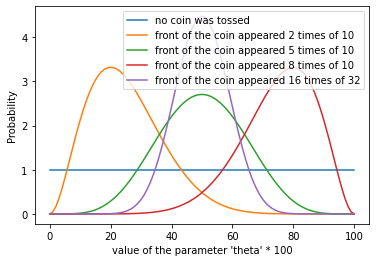

In [ ]:
# 試行回数
# n = 10
# r = [2, 5, 8]
available_thetas = np.arange(0, 1.01, step=0.01)

beta_flat = beta_distribution(available_thetas, 1, 1)
beta_2 = beta_distribution(available_thetas, 3, 9)
beta_5 = beta_distribution(available_thetas, 6, 6)
beta_8 = beta_distribution(available_thetas, 9, 3)
beta_16 = beta_distribution(available_thetas, 16, 16)

plt.plot(beta_flat, label="no coin was tossed")
plt.plot(beta_2, label="front of the coin appeared 2 times of 10")
plt.plot(beta_5, label="front of the coin appeared 5 times of 10")
plt.plot(beta_8, label="front of the coin appeared 8 times of 10")
plt.plot(beta_16, label="front of the coin appeared 16 times of 32")
plt.xlabel("value of the parameter 'theta' * 100")
plt.ylabel("Probability")
plt.legend()
plt.show()

## p.61 ベイズ推定の実験

$\textbf{x}^{(10)} = HHHHTHHTHT$

$p(\theta|\textbf{x}^{(0)}) = Be(1, 1)$  
$p(\theta|\textbf{x}^{(1)}) = Be(2, 1)$  
$p(\theta|\textbf{x}^{(2)}) = Be(3, 1)$  
$p(\theta|\textbf{x}^{(3)}) = Be(4, 1)$  
...  
$p(\theta|\textbf{x}^{(8)}) = Be(7, 3)$  
$p(\theta|\textbf{x}^{(9)}) = Be(8, 3)$  
$p(\theta|\textbf{x}^{(10)}) = Be(8, 4)$


これらを描画する

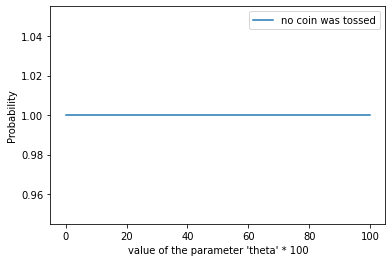

In [ ]:
available_thetas = np.arange(0, 1.01, step=0.01)

result = beta_distribution(available_thetas, 1, 1)
plt.plot(result, label="no coin was tossed")
plt.xlabel("value of the parameter 'theta' * 100")
plt.ylabel("Probability")
plt.legend()
plt.show()

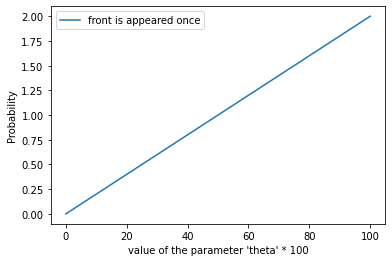

In [ ]:
result = beta_distribution(available_thetas, 2, 1)
plt.plot(result, label="front is appeared once")
plt.xlabel("value of the parameter 'theta' * 100")
plt.ylabel("Probability")
plt.legend()
plt.show()

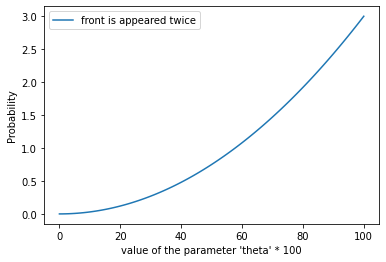

In [ ]:
result = beta_distribution(available_thetas, 3, 1)
plt.plot(result, label="front is appeared twice")
plt.xlabel("value of the parameter 'theta' * 100")
plt.ylabel("Probability")
plt.legend()
plt.show()

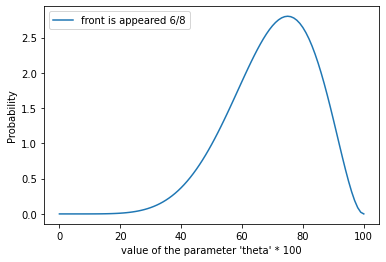

In [ ]:
result = beta_distribution(available_thetas, 7, 3)
plt.plot(result, label="front is appeared 6/8")
plt.xlabel("value of the parameter 'theta' * 100")
plt.ylabel("Probability")
plt.legend()
plt.show()

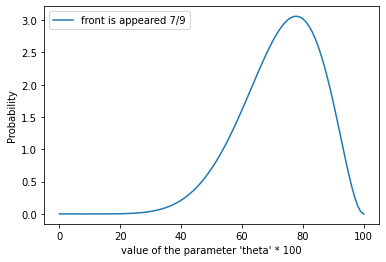

In [ ]:
result = beta_distribution(available_thetas, 8, 3)
plt.plot(result, label="front is appeared 7/9")
plt.xlabel("value of the parameter 'theta' * 100")
plt.ylabel("Probability")
plt.legend()
plt.show()

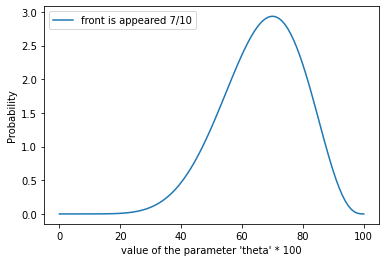

In [ ]:
result = beta_distribution(available_thetas, 8, 4)
plt.plot(result, label="front is appeared 7/10")
plt.xlabel("value of the parameter 'theta' * 100")
plt.ylabel("Probability")
plt.legend()
plt.show()

ベイズ推定を行うときに事前分布を一様関数と仮定する場合は、  
単にBeta分布を用いるだけで良いことがわかる。

## p.63 nを100や1000にする



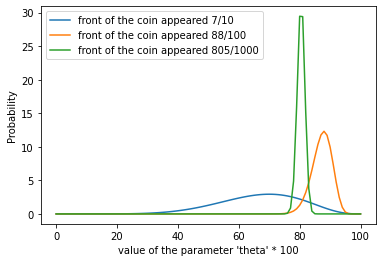

In [ ]:
beta_10 = beta_distribution(available_thetas, 8, 4)
beta_100 = beta_distribution(available_thetas, 89, 13)
beta_1000 = beta_distribution(available_thetas, 806, 196)

plt.plot(beta_10, label="front of the coin appeared 7/10")
plt.plot(beta_100, label="front of the coin appeared 88/100")
plt.plot(beta_1000, label="front of the coin appeared 805/1000")

plt.xlabel("value of the parameter 'theta' * 100")
plt.ylabel("Probability")
plt.legend()
plt.show()

## p.64 事前分布の効果

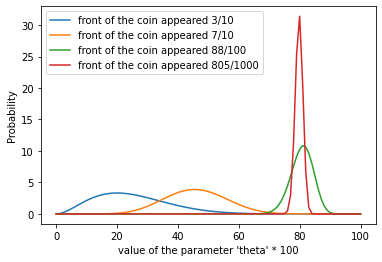

In [ ]:
prior_distribution = beta_distribution(available_thetas, 3, 9)

beta_10 = beta_distribution(available_thetas, 8 + 3, 4 + 9)
beta_100 = beta_distribution(available_thetas, 89 + 3, 13 + 9)
beta_1000 = beta_distribution(available_thetas, 806 + 3, 196 + 9)

plt.plot(prior_distribution, label="front of the coin appeared 3/10")
plt.plot(beta_10, label="front of the coin appeared 7/10")
plt.plot(beta_100, label="front of the coin appeared 88/100")
plt.plot(beta_1000, label="front of the coin appeared 805/1000")

plt.xlabel("value of the parameter 'theta' * 100")
plt.ylabel("Probability")
plt.legend()
plt.show()

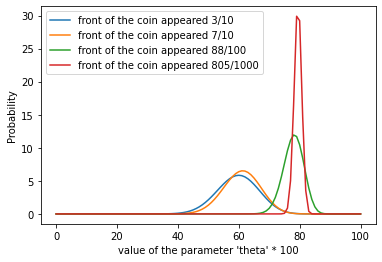

In [ ]:
prior_distribution = beta_distribution(available_thetas, 31, 21)

beta_10 = beta_distribution(available_thetas, 8 + 31, 4 + 21)
beta_100 = beta_distribution(available_thetas, 89 + 31, 13 + 21)
beta_1000 = beta_distribution(available_thetas, 806 + 31, 196 + 21)

plt.plot(prior_distribution, label="front of the coin appeared 3/10")
plt.plot(beta_10, label="front of the coin appeared 7/10")
plt.plot(beta_100, label="front of the coin appeared 88/100")
plt.plot(beta_1000, label="front of the coin appeared 805/1000")

plt.xlabel("value of the parameter 'theta' * 100")
plt.ylabel("Probability")
plt.legend()
plt.show()

ベイズ推定の事前分布をBeta分布とする場合は、推定結果を出す際に、事前分布であるBeta分布のαとβをベイズ推定に使うαとβにそれぞれ足してあげればよい。

これは、たとえば「10回のコイントス試行の前に、既に10回分コイントス試行が実施済みだった」と考えるとわかりやすい。
（この計算方法で良さそうだ、と直感的に感じられませんか？）

でも、こうすると、事前分布がBeta分布じゃなかった場合の実装方法がわからない、ということに気が付いた。どうしたものか...。（保留）

## p.69 ディリクレ分布

p.71の 式(4・70)を実装する


### 参考

- ディリクレ(Dirichlet)分布を3Dで可視化する  
https://cartman0.hatenablog.com/entry/2021/02/27/%E3%83%87%E3%82%A3%E3%83%AA%E3%82%AF%E3%83%AC%28Dirichlet%29%E5%88%86%E5%B8%83%E3%82%923D%E3%81%A7%E5%8F%AF%E8%A6%96%E5%8C%96%E3%81%99%E3%82%8B
- 【Python】ディリクレ分布の作図  
https://www.anarchive-beta.com/entry/2022/10/19/120500


2つ目のURLに記載されているコードは理解に時間がかかりそうだったので、1つ目の「ディリクレ(Dirichlet)分布を3Dで可視化する」を真似して実装する

In [ ]:
from scipy import special


def dirichlet(thetas: np.ndarray, alphas: np.ndarray) -> np.ndarray:
    """
    ディリクレ分布の確率密度関数を返す

    p.71の 式(4・70)をと対応がわかりやすいような引数名、変数名にしたつもり

    ・numeratorは分子
    ・denominatorは分母のこと

    あとはnp.prodが積演算であることがわかれば、コードと式の対応が分かるはず。
    """
    sum_alpha = np.sum(alphas)
    gamma_numerator = special.gamma(sum_alpha)
    gamma_denominator = np.prod(special.gamma(alphas))

    probability_density_function = (
        gamma_numerator / gamma_denominator * np.prod(thetas ** (alphas - 1))
    )
    return probability_density_function


In [ ]:
# 描画処理は数式を理解する際には本質的な問題ではないので、
# 前記参考記事をほぼ丸々コピーした

def show_3d_dirichlet_distribution(alphas: np.ndarray) -> None:
    xdata = np.linspace(0, 1, 200)
    ydata = np.linspace(0, 1, 200)
    X, Y = np.meshgrid(xdata, ydata)
    z = []
    X[X + Y > 1] = 0
    Y[X + Y > 1] = 0
    for _x, _y, _z in zip(X.flatten(), Y.flatten(), (1-X-Y).flatten()):
        z.append(dirichlet(np.array([_x, _y, _z]), alphas))

    Z = np.array(z).reshape(X.shape)
    ax3d = plt.axes(projection='3d')
    ax3d.plot_surface(X, Y, Z,cmap='plasma')
    # ax3d.set_zlim(zlim)
    ax3d.set_xlabel("$\\theta_1$")
    ax3d.set_ylabel("$\\theta_2$")
    ax3d.set_zlabel("pdf$(\\theta_1,\\theta_2,1-\\theta_1-\\theta_2)$")
    ax3d.set_title("Dir($\\vec{\\alpha} = $" + "%s)" % alphas)
    plt.show()


alphas = np.array([1., 1., 1.])
show_3d_dirichlet_distribution(alphas)

In [ ]:
alphas = np.array([4., 4., 4.])
show_3d_dirichlet_distribution(alphas)

In [ ]:
alphas = np.array([8., 8., 8.])
show_3d_dirichlet_distribution(alphas)

In [ ]:
alphas = np.array([2., 4., 6.])
show_3d_dirichlet_distribution(alphas)

# 第5章 教師付き学習と教師なし学習

## 前提条件

In [2]:
pis = [0.1, 0.4, 0.5]
thetas = np.array([0.8, 0.6, 0.3])

num_of_rounds = 10_000


## 実験用データ生成

p.95に記載の実験条件と実験結果に従って生成する

In [3]:
def select_dices(pis: list, num: int = 10) -> np.ndarray:
    """
    pisで指定した確率に基づいて、num回diceを取り出す

    Parameters
    ------
    pis: list
        それぞれのdiceの含有率
        Example: [0.2, 0.3, 0.5]

    num: int
        diceを取り出す回数
        Example: 100

    Return
    ------
    count_of_selected_dices: np.ndarray
        それぞれのdiceが選択された回数
        Example: np.array([12, 36, 52])
    """
    available_dices = [0, 1, 2]
    selected_dices = np.random.choice(a=available_dices, size=num, p=pis)
    count_of_selected_dices = np.bincount(selected_dices)
    return count_of_selected_dices


def count_face_of_dices(thetas: list, num_of_selected_dices: np.ndarray) -> np.ndarray:
    """
    thetasで指定した確率に基づいて、diceを振った結果を返す

    Parameters
    ------
    thetas: list
        それぞれのdiceが奇数の目を出す確率
        Example: [0.2, 0.3, 0.5]

    num_of_selected_dices: np.ndarray
        それぞれのdiceが選択された個数
        Example: np.array([12, 36, 52])

    Return
    ------
    count_of_selected_dices: np.ndarray
        それぞれのdiceを振った結果を連結したもの
        1次元配列になっている
        Example: np.array([0, 1, 0, 0 ..., 1])
    """
    num_face_of_dices = np.array([])
    for dice_no, count in enumerate(num_of_selected_dices):
        # サイコロの奇数の目が出る確率
        theta = thetas[dice_no]

        # 各サイコロ毎に、まとめて振る
        # たとえば、①のサイコロが88回選ばれているなら、①のサイコロだけを一気に88回振る
        face_of_dices = np.random.choice([0, 1], size=count , p=[theta, 1 - theta])
        num_face_of_dices = np.append(num_face_of_dices, face_of_dices)
    return num_face_of_dices


num_of_selected_dices = select_dices(pis, num_of_rounds)
# 出たサイコロの目の総リスト
x = count_face_of_dices(thetas, num_of_selected_dices)

# 選ばれたサイコロの総リスト
s = (
    [0] * num_of_selected_dices[0]
     + [1] * num_of_selected_dices[1]
     + [2] * num_of_selected_dices[2]
)
 

# x, s ともに、サイコロの種類ごとにソートされてしまっているので、シャッフルする
index_of_dices_series = np.arange(0, 10000)
np.random.shuffle(index_of_dices_series)

shuffled_x = pd.Series(x)[index_of_dices_series].astype(int)
shuffled_s = pd.Series(s)[index_of_dices_series].astype(int)


print("それぞれのサイコロが取り出された回数: ")
print("1...", num_of_selected_dices[0])
print("2...", num_of_selected_dices[1])
print("3...", num_of_selected_dices[2])
print("サイコロ1を振った結果", np.bincount(pd.Series(x)[0:num_of_selected_dices[0]]))
print("サイコロ2を振った結果", np.bincount(pd.Series(x)[num_of_selected_dices[0] + 1:-num_of_selected_dices[2] + 1]))
print("サイコロ3を振った結果", np.bincount(pd.Series(x)[-num_of_selected_dices[2]:]))

それぞれのサイコロが取り出された回数: 
1... 989
2... 4032
3... 4979
サイコロ1を振った結果 [790 199]
サイコロ2を振った結果 [2492 1540]
サイコロ3を振った結果 [1494 3485]


## p.83 教師付き学習


ほぼ、[Qiita / 続・わかりやすい　パターン認識　教師なし学習入門　アルゴリズムのサンプルコードを書いてみた](https://qiita.com/akiraichi5430/items/60ce2829a1b72dce5bca#5%E7%AB%A0%E6%95%99%E5%B8%AB%E4%BB%98%E3%81%8D%E5%AD%A6%E7%BF%92%E6%95%99%E5%B8%AB%E3%81%AA%E3%81%97%E5%AD%A6%E7%BF%92)に載っていた通りにコピーさせていただいた

In [ ]:
class SupervisedLearning(object):
    def __init__(self):
        self.pi = None
        self.theta = None
        self.n = None

    def fit(self, x, s):
        self.n = self.__count(x, s)
        self.pi = self.n.sum(axis=1) / self.n.sum()
        self.theta = self.n / np.tile(self.n.sum(axis=1), (self.n.shape[1], 1)).T

    @staticmethod
    def __count(x, s):
        n = np.zeros((max(s) + 1, max(x) + 1))
        for x_, s_ in zip(x, s):
            n[s_][x_] += 1
        return n


supervised = SupervisedLearning()
supervised.fit(shuffled_x, shuffled_s)
print(f"pi: {supervised.pi}")
print(f"theta: {supervised.theta}")

## p.86 教師なし学習

### step 1

- $\pi_i$に対して仮の初期値を与える  
値はp.95に従う
- $\theta_{ik}は既知とする$

In [4]:
initial_pi_estimations = np.array([0.3, 0.5, 0.2])
print("π(初期値): ", initial_pi_estimations)
print("θ(既知)", thetas)

π(初期値):  [0.3 0.5 0.2]
θ(既知) [0.8 0.6 0.3]


### step 2

$$
P(\omega_i|v_k) = \frac{\pi_i * \theta_{ik}}{\sum^c_{j=1} \pi_j * \theta_{jk}}
$$

を計算する


In [5]:
# TODO: check
def step2(initial_pis, thetas) -> np.ndarray:
    pi_x_theta = initial_pi_estimations * np.array([thetas, 1 - thetas])
    sum_pi_x_theta = np.sum(pi_x_theta, axis=1)
    p_omega_v = (pi_x_theta) / np.tile(sum_pi_x_theta, (3, 1)).T
    return p_omega_v


p = step2(initial_pi_estimations, thetas)
p

array([[0.4 , 0.5 , 0.1 ],
       [0.15, 0.5 , 0.35]])

In [6]:
pi_x_theta = initial_pi_estimations * np.array([thetas, 1 - thetas])
pi_x_theta

array([[0.24, 0.3 , 0.06],
       [0.06, 0.2 , 0.14]])

### step 3-1

$$
\hat\pi_i = \frac{1}{n} \sum^m_{k=1} r_k * P(\omega_i|v_k)
$$

を計算する


In [51]:
print("サイコロ1を振った結果", np.bincount(pd.Series(x)[0:num_of_selected_dices[0]]))
print("サイコロ2を振った結果", np.bincount(pd.Series(x)[num_of_selected_dices[0] + 1:-num_of_selected_dices[2] + 1]))
print("サイコロ3を振った結果", np.bincount(pd.Series(x)[-num_of_selected_dices[2]:]))
print("より、\n")

r_k = np.array([
    np.bincount(pd.Series(x)[0:num_of_selected_dices[0]]),
    np.bincount(pd.Series(x)[num_of_selected_dices[0] + 1:-num_of_selected_dices[2] + 1]),
    np.bincount(pd.Series(x)[-num_of_selected_dices[2]:])
])
print("r_k: \n", np.sum(r_k, axis=0))
print("r_k_T: \n", np.sum(r_k, axis=0).reshape(-1, 1))

# p_omega_v = np.array([p, 1 - p])
print("p_omega_v: \n", p)


def step3_1(n: int, r_k: np.ndarray, p_omega_v: np.ndarray) -> np.ndarray:
    pi_i_hat = np.sum(r_k * p_omega_v, axis=0) / n
    return pi_i_hat


pi_i_hat = step3_1(10000, np.sum(r_k, axis=0).reshape(-1, 1), p)
print("pi_i_hat:", pi_i_hat)

サイコロ1を振った結果 [790 199]
サイコロ2を振った結果 [2492 1540]
サイコロ3を振った結果 [1494 3485]
より、

r_k: 
 [4776 5224]
r_k_T: 
 [[4776]
 [5224]]
p_omega_v: 
 [[0.4  0.5  0.1 ]
 [0.15 0.5  0.35]]
pi_i_hat: [0.2694 0.5    0.2306]


### step 3-2

$$
\hat{P}(\omega_i|v_k) = \frac{\hat\pi_i * \theta_{ik}}{\sum^c_{j=1} \hat\pi_j * \theta_{jk}}
$$

を計算する

In [8]:
def step3_2_P_hat(pi_hat, thetas) -> np.ndarray:
    p_hat = (pi_hat * np.array(thetas)) / sum(pi_hat * np.array(thetas))
    return p_hat


def step3_2_theta_hat(r_k, P_hat) -> np.ndarray:
    theta_hat = (r_k * P_hat) / np.tile(np.sum(r_k * P_hat, axis=0), (2, 1))
    return theta_hat


p_hat = step3_2_P_hat(pi_i_hat, thetas)
P_hat = np.array([p_hat, 1 - p_hat])

print("p_hat:\n", p_hat)
print("P_hat:\n", P_hat)

theta_hat = step3_2_theta_hat(np.transpose(r_k), P_hat)
theta_hat

p_hat:
 [0.36859928 0.51308363 0.11831709]
P_hat:
 [[0.36859928 0.51308363 0.11831709]
 [0.63140072 0.48691637 0.88168291]]


array([[0.69856999, 0.63033394, 0.05439898],
       [0.30143001, 0.36966606, 0.94560102]])

### step 4

$$
\pi_i = \hat\pi_i \\
\theta_{ik} = \hat\theta_{ik}
$$

In [9]:
pi = pi_i_hat
theta = theta_hat

### まとめ

ここまでの step 1 ~ step 4 をまとめて繰り返し実行できるようにする

In [52]:
r_k = np.array([
    np.bincount(pd.Series(x)[0:num_of_selected_dices[0]]),
    np.bincount(pd.Series(x)[num_of_selected_dices[0] + 1:-num_of_selected_dices[2] + 1]),
    np.bincount(pd.Series(x)[-num_of_selected_dices[2]:])
])
r_k_T = np.sum(r_k, axis=0).reshape(-1, 1)
print("r_k_T:", r_k_T)

# step1
initial_pi_estimations = np.array([0.3, 0.5, 0.2])
thetas


class UnsupervisedLearning:
    def __init__(
        self,
        n: int,
        initial_pi_hat: np.ndarray,
        initial_theta_hat: np.ndarray,
        r_k_T: np.ndarray
    ):
        self.n = n
        self.pi_hat = initial_pi_hat
        self.theta_hat = initial_theta_hat
        self.r_k_T = r_k_T

    def fit(self):
        epsilon = 1e-8
        variation = np.array([1, 1, 1])
        num_round = 0
        pi_hat_hist = np.array([self.pi_hat])

        while((np.abs(variation) > epsilon).any()):
            num_round += 1

            # step2
            p = self.step2()

            # step3
            pi_i_hat = self.step3_1(p)
            P_hat = self.step3_2_P_hat(pi_i_hat)
            theta_hat = self.step3_2_theta_hat(P_hat)

            variation = pi_i_hat - self.pi_hat

            # step4
            self.pi_hat = pi_i_hat
            # 今回は更新しない theta は既知として扱うため
            # p.95の実験条件の5項目目を参照
            #   注) "step3は省いた"と記載されているが、おそらく"step3-2省いた"が正しいと思われる
            # theta = theta_hat

            pi_hat_hist = np.concatenate([pi_hat_hist, [self.pi_hat]], axis=0)
            print(num_round, "pi_hat:", self.pi_hat, "max variation:", max(variation))

        self.pi_hat_hist = pi_hat_hist

    def step2(self) -> np.ndarray:
        pi_x_theta = self.pi_hat * np.array([self.theta_hat, 1 - self.theta_hat])
        sum_pi_x_theta = np.sum(pi_x_theta, axis=1)
        p_omega_v = (pi_x_theta) / np.tile(sum_pi_x_theta, (3, 1)).T
        return p_omega_v

    def step3_1(self, p_omega_v: np.ndarray) -> np.ndarray:
        pi_i_hat = np.sum(self.r_k_T * p_omega_v, axis=0) / self.n
        return pi_i_hat

    def step3_2_P_hat(self, pi_hat: np.ndarray) -> np.ndarray:
        p_hat = (pi_hat * np.array(self.theta_hat)) / sum(pi_hat * np.array(self.theta_hat))
        return p_hat

    def step3_2_theta_hat(self, P_hat: np.ndarray) -> np.ndarray:
        theta_hat = (self.r_k_T * P_hat) / np.tile(np.sum(self.r_k_T * P_hat, axis=0), (2, 1))
        return theta_hat

    # def calc_log_P(self, r_k, pi_hat, thetas):
    #     _r_k = np.sum(r_k, axis=0)
    #     pi_x_theta = pi_hat * np.array([thetas, 1 - thetas])
    #     _sum_pi_i_theta = np.sum(pi_x_theta, axis=1)
    #     log_P = sum(_r_k * np.log(sum_pi_x_theta))
    #     return log_P


model = UnsupervisedLearning(10000, initial_pi_estimations, thetas, r_k_T)
model.fit()

r_k_T: [[4776]
 [5224]]
1 pi_hat: [0.2694 0.5    0.2306] max variation: 0.030599999999999933
2 pi_hat: [0.24381791 0.49662592 0.25955618] max variation: 0.028956176554635366
3 pi_hat: [0.22254416 0.49112141 0.28633442] max variation: 0.02677824826923919
4 pi_hat: [0.20489447 0.4844426  0.31066293] max variation: 0.02432850842242057
5 pi_hat: [0.19025358 0.47727561 0.3324708 ] max variation: 0.02180786849103883
6 pi_hat: [0.17809188 0.47008342 0.35182469] max variation: 0.019353892404589956
7 pi_hat: [0.16796568 0.46315897 0.36887534] max variation: 0.017050649268785967
8 pi_hat: [0.1595095  0.45667296 0.38381754] max variation: 0.014942194601912151
9 pi_hat: [0.15242515 0.45071211 0.39686274] max variation: 0.013045197485051063
10 pi_hat: [0.14647054 0.44530775 0.40822172] max variation: 0.011358980072221858
11 pi_hat: [0.14144934 0.44045619 0.41809448] max variation: 0.009872760612583242
12 pi_hat: [0.13720223 0.43613276 0.42666501] max variation: 0.008570534216224224
13 pi_hat: [0.13

Text(0, 0.5, 'Estimation of probability')

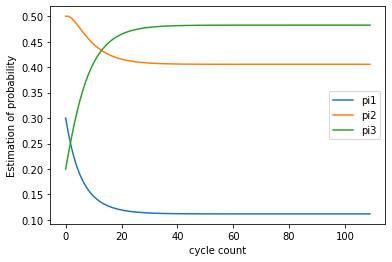

In [53]:
result = pd.DataFrame(model.pi_hat_hist) \
           .rename(columns={0: "pi1", 1: "pi2", 2: "pi3"})

result.plot()
plt.xlabel("cycle count")
plt.ylabel("Estimation of probability")

### おまけに

p.96の $\log_{}P(\textbf{x})$ も計算してグラフを出したいので、それも付け加える。


$\log_{}P(\textbf{x})$ は、p.87の(5.51)式と(5.53)式から、以下のように導出できる。


$$
\log_{}P(\textbf{x}) = \sum^m_{k=1} r_k * \log_{}P(v_k)\\
= \sum^m_{k=1} r_k * \log \left(\sum^c_{i=1} \pi_i * \theta_{ik} \right)
$$


In [55]:
# r_k
np.sum(r_k, axis=0)

array([4776, 5224])

In [37]:
# sum(pi_i * theta_ik)
pi_x_theta = initial_pi_estimations * np.array([thetas, 1 - thetas])
sum_pi_x_theta = np.sum(pi_x_theta, axis=1)
sum_pi_x_theta

array([0.6, 0.4])

In [54]:
# log_P(x)
def calc_log_P(r_k, pi_hat, thetas):
    _r_k = np.sum(r_k, axis=0)
    pi_x_theta = pi_hat * np.array([thetas, 1 - thetas])
    _sum_pi_i_theta = np.sum(pi_x_theta, axis=1)
    log_P = sum(_r_k * np.log(sum_pi_x_theta))
    return log_P


calc_log_P(r_k, initial_pi_estimations, thetas)

-7226.405962416957

In [43]:
np.array([thetas, 1 - thetas])

array([[0.8, 0.6, 0.3],
       [0.2, 0.4, 0.7]])

In [44]:
initial_pi_estimations * np.array([thetas, 1 - thetas])

array([[0.24, 0.3 , 0.06],
       [0.06, 0.2 , 0.14]])